In [12]:
import json
import re
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:

fpath = 'large_large_data.json'
def load_json_ignore_trailing_commas(file_path):
    with open(file_path, 'r') as file:
        # Read the file content
        content = file.read()
        
        # Remove trailing commas from JSON objects and arrays
        # This regex finds trailing commas in JSON
        content = re.sub(r',\s*([\]}])', r'\1', content)
        
        # Load the cleaned JSON content
        return json.loads(content)

# Example usage
json_data = load_json_ignore_trailing_commas(fpath)
print(type(json_data))

#print(json_data)



<class 'list'>


In [14]:
# Initialize a list to hold all the extracted data
from statistics import mean
data = []

# Define the parameter list you are interested in
param_list = [
    "elite_ratio",
    "initial_pop_size",
    "mutate_prob",
    "selection_pool_size",
    "selection_pool_percentage"
]

# Iterate through the JSON data to extract metrics and parameters
for entry in json_data:
    # Extract metrics
    stat_calc = mean([entry['avg_fitness']['Average Fitness'][str(i)] for i in range(48, 51)])# Get the last value
    max_fitness = entry['max_fitness']['Fitness']['50'] # Get the last value
    diversity = mean([entry['diversity']['diversity'][str(i)] for i in range(48, 51)])     # Get the last value

    # Extract parameters
    params = {param: entry['config_params'].get(param) for param in param_list}

    # Append the metrics and parameters to the data list
    data.append({
        **params,
        'avg_fitness': stat_calc,
        'max_fitness': max_fitness,
        'diversity': diversity
    })

# Create a DataFrame from the data
df = pd.DataFrame(data)
df = df[df['mutate_prob'] != 0]
#df = df[df['initial_pop_size'] != 100]


In [59]:
all_avg_fitness = []
all_max_fitness = []
all_diversity = []
for entry in json_data:

    if entry['config_params']['initial_pop_size'] == 1000 and \
        entry['config_params']['mutate_prob'] != 0.5 and \
        entry['config_params']['elite_ratio'] != 0.05:
        
        all_avg_fitness.append(pd.DataFrame(entry['avg_fitness']))
        all_max_fitness.append(pd.DataFrame(entry['max_fitness']))
        all_diversity.append(pd.DataFrame(entry['diversity']))

print(all_avg_fitness[0])
print(all_diversity[0])

    Generation  Average Fitness       std
0            0    -4.027889e-16  2.061540
1            1     5.561880e-02  2.136679
2            2     5.338404e-02  2.138305
3            3     7.092146e-02  2.116754
4            4     9.059286e-02  2.094922
5            5     6.911927e-02  2.063775
6            6     9.238570e-02  2.058680
7            7     8.573885e-02  2.066166
8            8     1.238131e-01  2.066951
9            9     1.444955e-01  1.978865
10          10     2.019690e-01  1.931904
11          11     9.809547e-01  1.671200
12          12     9.244365e-01  1.807965
13          13     1.104478e+00  1.583661
14          14     9.003868e-01  1.779575
15          15     1.066190e+00  1.483179
16          16     8.247539e-01  1.797929
17          17     9.231677e-01  1.595397
18          18     8.533585e-01  1.757333
19          19     9.924300e-01  1.606814
20          20     7.681815e-01  1.754026
21          21     8.984157e-01  1.803459
22          22     9.579348e-01  1

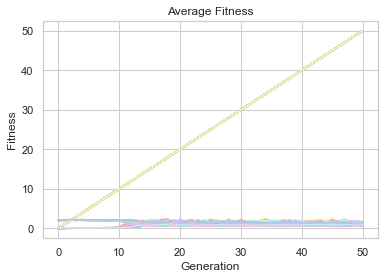

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# plot avg_fitness

fig, ax = plt.subplots()
for i in range(len(all_avg_fitness)):
    all_avg_fitness[i].plot(ax=ax, legend=False)
plt.title('Average Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()



In [15]:
df['selection_pool_percentage'] = df['selection_pool_size'] / df['initial_pop_size']

In [16]:
#df.groupby(['elite_ratio','initial_pop_size','selection_pool_percentage', 'mutate_prob'])[['avg_fitness', 'max_fitness', 'diversity']].mean()
#df.groupby(['mutate_prob','initial_pop_size'])[['avg_fitness', 'max_fitness', 'diversity']].mean()


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# drop where mutate_prob is 0.0


# Group the DataFrame and calculate the mean of avg_fitness
grouped = df.groupby(['selection_pool_percentage'])[['diversity']].mean().reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))

# Use seaborn lineplot to plot the lines for each initial_pop_size, with a different palette
sns.lineplot(data=grouped, x='initial_pop_size', y='diversity', hue='elite_ratio', marker="o", palette="bright")

# Adding titles and labels
plt.title('Avg Fitness vs Mutate Probability for Different Initial Population Sizes', fontsize=24)
plt.xlabel('Elite Ratio', fontsize=24)
plt.ylabel('Avg Fitness', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Show the plot
# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


ValueError: Could not interpret value `initial_pop_size` for parameter `x`

<Figure size 720x432 with 0 Axes>

In [20]:
df.groupby('elite_ratio')[['avg_fitness']].mean().reset_index()


,elite_ratio,avg_fitness
0,0.05,1.145960
1,0.10,0.887811
2,0.15,0.790964
3,0.20,0.728516
4,0.25,0.602814


In [ ]:
# Group by mutation_probability, initial_population_size, elite_ratio and calculate the mean diversity
stat_calc = df.groupby(['mutate_prob', 'initial_pop_size', 'elite_ratio'])[['diversity']].mean().reset_index()

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot with generations on the x-axis, diversity on the y-axis, and different lines for each elite_ratio
sns.lineplot(
    data=stat_calc, 
    x='elite_ratio', 
    y='diversity', 
    hue='elite_ratio',  # Different lines for each elite_ratio
    marker='o'
)

# Adding titles and labels
plt.title('Diversity vs. Generations for Different Elite Ratios', fontsize=16)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Diversity', fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge

param_list = [
    "elite_ratio",
    "initial_pop_size",
    "mutate_prob",
    #"selection_pool_size",
    "selection_pool_percentage",
]

for param in param_list:
    
    stat = 'diversity'

    # Set up the predictors (X) and target variable (y)
    X = df[[param]]
    y = df[stat]
    X = sm.add_constant(X)  # Add constant term for intercept

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Print the summary of the OLS regression
    print(f'Model Summary For {stat} vs {param} (OLS):')
    print(model.summary())

    # VIF Calculation
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # print(f'Variance Inflation Factor (VIF) for {param}:')
    # print(vif_data)

    # Fit Ridge Regression model
    ridge_model = Ridge(alpha=1.0)  # You can adjust alpha as needed
    ridge_model.fit(X, y)

    # Print Ridge regression coefficients
    ridge_coefficients = pd.DataFrame({
        "Feature": X.columns,
        "Coefficient": ridge_model.coef_
    })
    # print(f'Ridge Regression Coefficients for {stat} vs {param}:')
    # print(ridge_coefficients)

    # Plotting the regression line for OLS
    plt.figure(figsize=(10, 6))
    sns.regplot(x=param, y=stat, data=df, scatter_kws={'alpha':0.5})
    plt.title(f'{stat} vs. {param} with Regression Line (OLS)', fontsize=28)
    plt.xlabel(param, fontsize=24)
    plt.ylabel(stat, fontsize=24)
    plt.xticks(fontsize=18)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=18)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # stat_calc = df.groupby(param)[[stat]].mean().reset_index()

    # # Set the aesthetic style of the plots
    # sns.set(style='whitegrid')

    # # Create the plot
    # plt.figure(figsize=(10, 6))
    # sns.lineplot(data=stat_calc, x=param, y=stat, marker='o')

    # # Adding titles and labels
    # plt.title(f'{stat} vs. {param}', fontsize=24)
    # plt.xlabel(param, fontsize=24)
    # plt.ylabel(stat, fontsize=24)
    # plt.xticks(rotation=45, fontsize=18)  # Rotate x-axis labels for better readability
    # plt.yticks(fontsize=18)
    # plt.grid(True)

    # # Show the plot
    # plt.tight_layout()
    # plt.show()

Initial Population Size: 100
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                 -0.089
Method:                 Least Squares   F-statistic:                    0.5913
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.485
Time:                        21:07:12   Log-Likelihood:                 18.689
No. Observations:                   6   AIC:                            -33.38
Df Residuals:                       4   BIC:                            -33.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


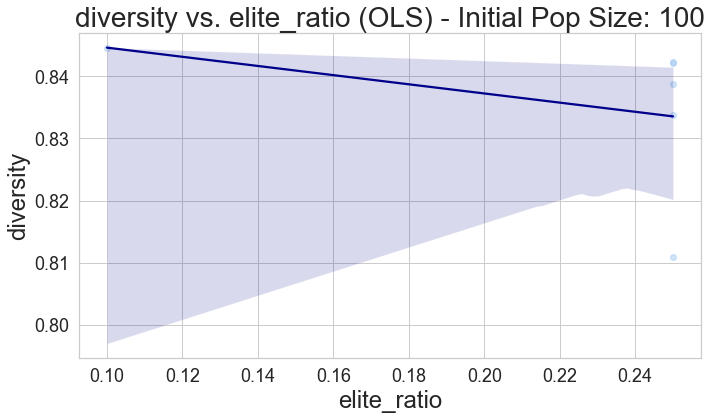

Model Summary For diversity vs mutate_prob (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                    0.3685
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.577
Time:                        21:07:12   Log-Likelihood:                 18.540
No. Observations:                   6   AIC:                            -33.08
Df Residuals:                       4   BIC:                            -33.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


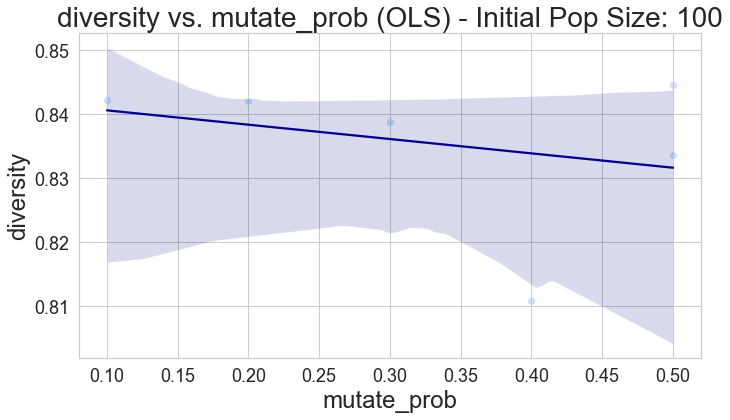

Initial Population Size: 500
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.119
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.294
Time:                        21:07:12   Log-Likelihood:                 209.79
No. Observations:                  68   AIC:                            -415.6
Df Residuals:                      66   BIC:                            -411.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

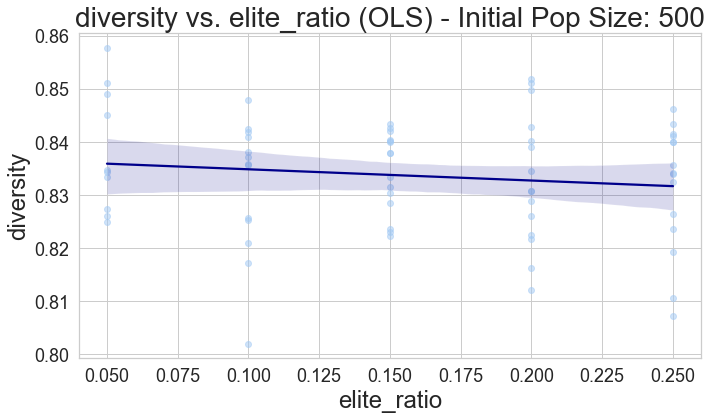

Model Summary For diversity vs mutate_prob (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     40.63
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           2.07e-08
Time:                        21:07:13   Log-Likelihood:                 225.53
No. Observations:                  68   AIC:                            -447.1
Df Residuals:                      66   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


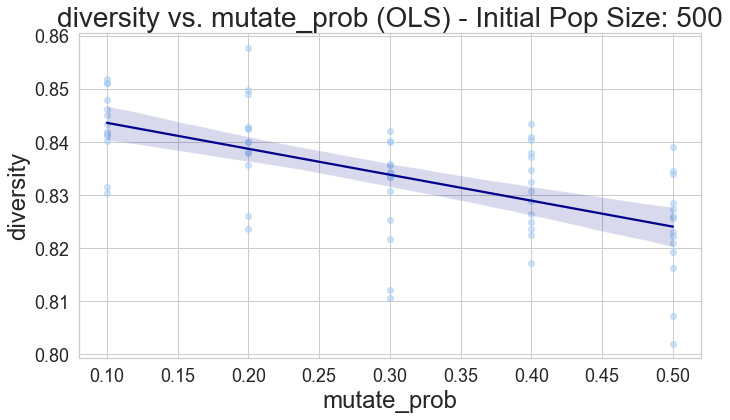

Initial Population Size: 1000
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     8.434
Date:                Tue, 22 Oct 2024   Prob (F-statistic):            0.00487
Time:                        21:07:13   Log-Likelihood:                 239.15
No. Observations:                  75   AIC:                            -474.3
Df Residuals:                      73   BIC:                            -469.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

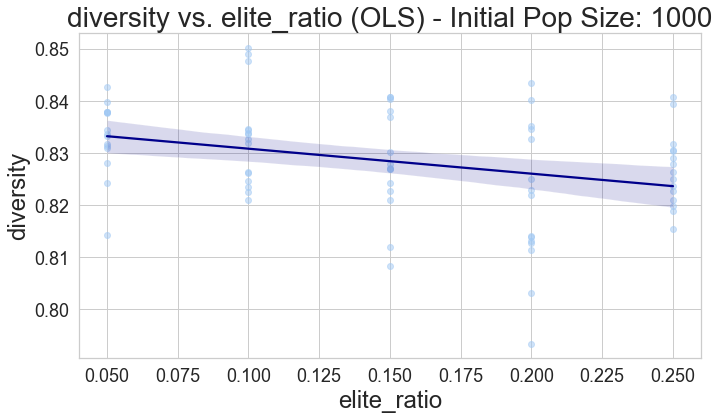

Model Summary For diversity vs mutate_prob (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     15.86
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           0.000159
Time:                        21:07:14   Log-Likelihood:                 242.43
No. Observations:                  75   AIC:                            -480.9
Df Residuals:                      73   BIC:                            -476.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


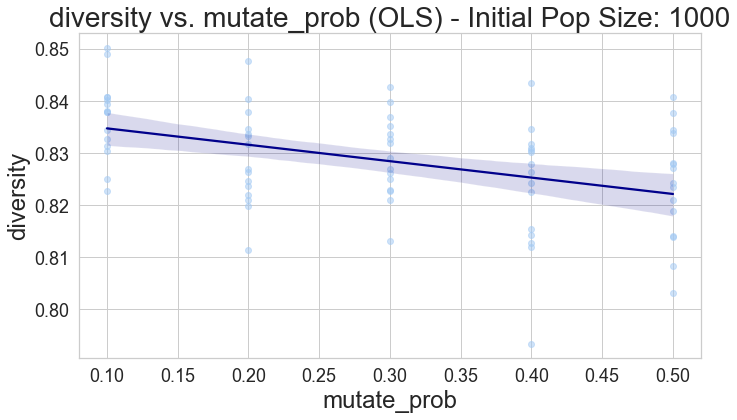

In [29]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge

# Define the parameters to analyze
param_list = [
    "elite_ratio",
    "mutate_prob",
    "Sel"
]

# Group the DataFrame by 'initial_pop_size'
groups = df.groupby('initial_pop_size')

# Iterate through each group
for initial_pop_size, group in groups:
    
    print(f'Initial Population Size: {initial_pop_size}')

    for param in param_list:
        
        stat = 'diversity'

        # Set up the predictors (X) and target variable (y)
        X = group[[param]]
        y = group[stat]
        X = sm.add_constant(X)  # Add constant term for intercept

        # Fit the linear regression model
        model = sm.OLS(y, X).fit()

        # Print the summary of the OLS regression
        print(f'Model Summary For {stat} vs {param} (OLS):')
        print(model.summary())

        # VIF Calculation
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        # Uncomment to print VIF
        # print(f'Variance Inflation Factor (VIF) for {param}:')
        # print(vif_data)

        # Fit Ridge Regression model
        ridge_model = Ridge(alpha=1.0)  # You can adjust alpha as needed
        ridge_model.fit(X, y)

        # Print Ridge regression coefficients
        ridge_coefficients = pd.DataFrame({
            "Feature": X.columns,
            "Coefficient": ridge_model.coef_
        })
        # Uncomment to print Ridge coefficients
        # print(f'Ridge Regression Coefficients for {stat} vs {param}:')
        # print(ridge_coefficients)

        # Plotting the regression line for OLS
        plt.figure(figsize=(10, 6))
        sns.regplot(x=param, y=stat, data=group, scatter_kws={'alpha':0.5}, line_kws={'color':'darkblue'})
        plt.title(f'{stat} vs. {param} (OLS) - Initial Pop Size: {initial_pop_size}', fontsize=28)
        plt.xlabel(param, fontsize=24)
        plt.ylabel(stat, fontsize=24)
        plt.xticks(fontsize=18)  # Rotate x-axis labels for better readability
        plt.yticks(fontsize=18)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


Initial Population Size: 100, Mutate Probability: 0.1
Skipping group with Initial Pop Size: 100 and Mutate Prob: 0.1 due to insufficient data.
Initial Population Size: 100, Mutate Probability: 0.2
Skipping group with Initial Pop Size: 100 and Mutate Prob: 0.2 due to insufficient data.
Initial Population Size: 100, Mutate Probability: 0.3
Skipping group with Initial Pop Size: 100 and Mutate Prob: 0.3 due to insufficient data.
Initial Population Size: 100, Mutate Probability: 0.4
Skipping group with Initial Pop Size: 100 and Mutate Prob: 0.4 due to insufficient data.
Initial Population Size: 100, Mutate Probability: 0.5
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:   

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.

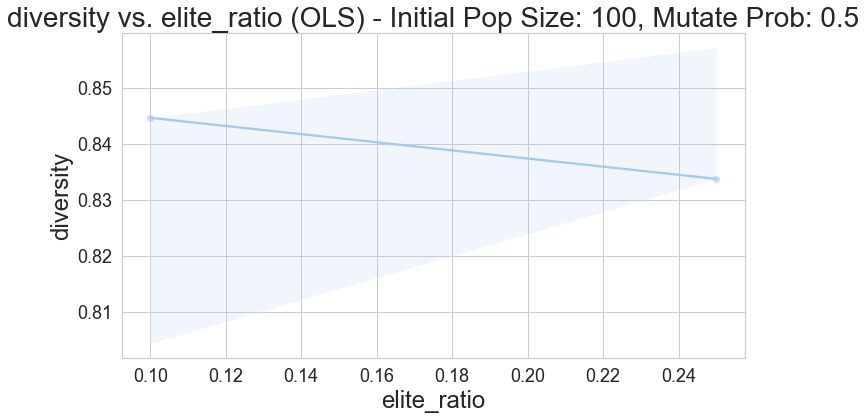

Initial Population Size: 500, Mutate Probability: 0.1
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.080
Method:                 Least Squares   F-statistic:                    0.1090
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.748
Time:                        21:09:08   Log-Likelihood:                 47.035
No. Observations:                  13   AIC:                            -90.07
Df Residuals:                      11   BIC:                            -88.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


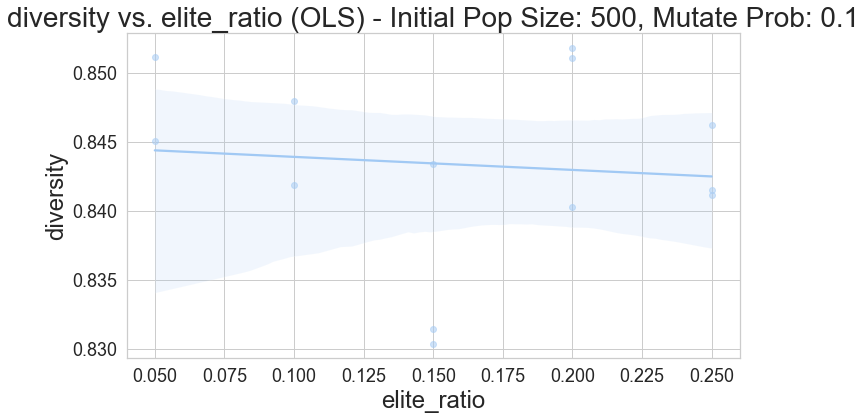

Initial Population Size: 500, Mutate Probability: 0.2
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     7.314
Date:                Tue, 22 Oct 2024   Prob (F-statistic):             0.0205
Time:                        21:09:09   Log-Likelihood:                 46.439
No. Observations:                  13   AIC:                            -88.88
Df Residuals:                      11   BIC:                            -87.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


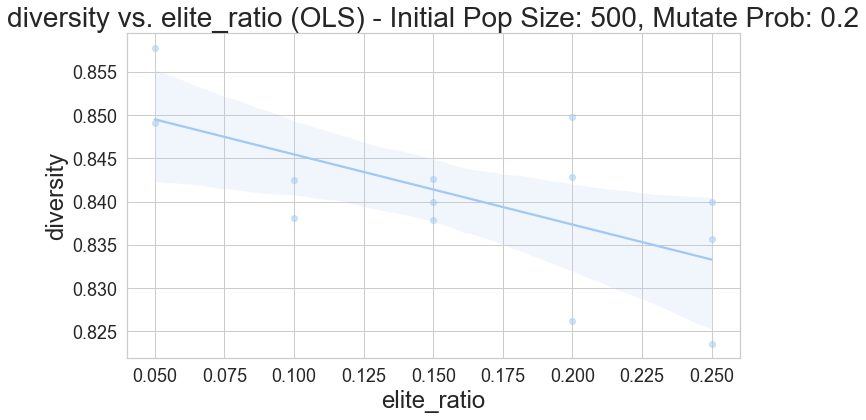

Initial Population Size: 500, Mutate Probability: 0.3
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.468
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.249
Time:                        21:09:09   Log-Likelihood:                 46.168
No. Observations:                  14   AIC:                            -88.34
Df Residuals:                      12   BIC:                            -87.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


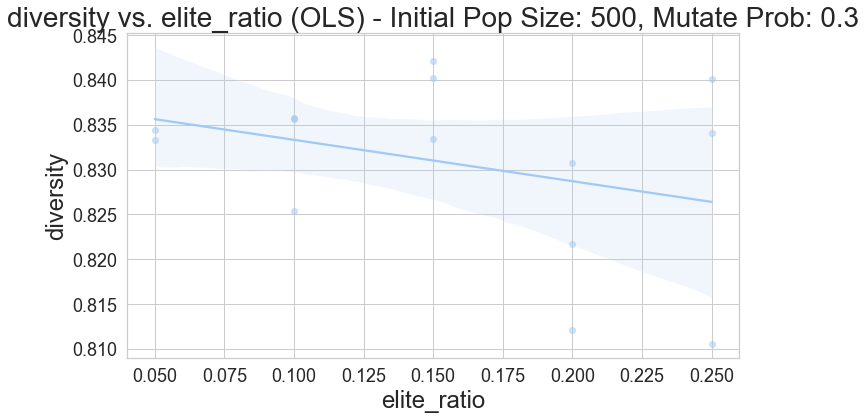

Initial Population Size: 500, Mutate Probability: 0.4
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.079
Method:                 Least Squares   F-statistic:                   0.04821
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.830
Time:                        21:09:10   Log-Likelihood:                 48.418
No. Observations:                  14   AIC:                            -92.84
Df Residuals:                      12   BIC:                            -91.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


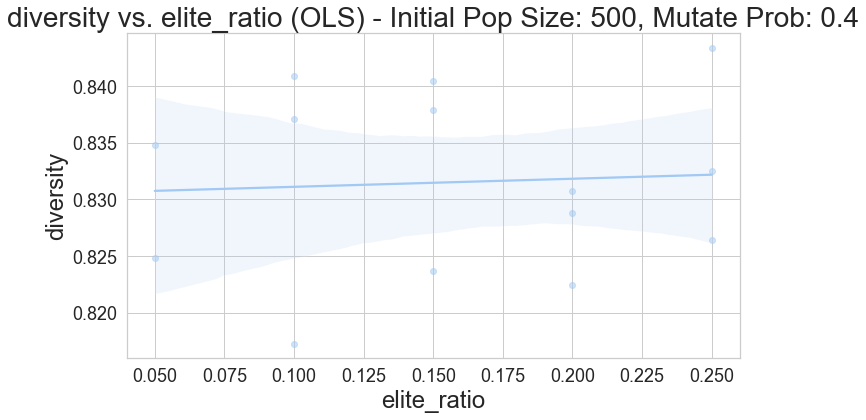

Initial Population Size: 500, Mutate Probability: 0.5
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.081
Method:                 Least Squares   F-statistic:                   0.02264
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.883
Time:                        21:09:10   Log-Likelihood:                 44.962
No. Observations:                  14   AIC:                            -85.92
Df Residuals:                      12   BIC:                            -84.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


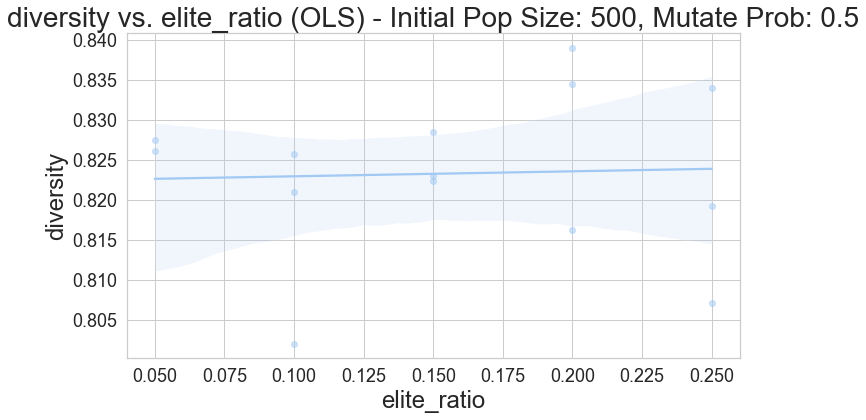

Initial Population Size: 1000, Mutate Probability: 0.1
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     2.734
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.122
Time:                        21:09:10   Log-Likelihood:                 53.822
No. Observations:                  15   AIC:                            -103.6
Df Residuals:                      13   BIC:                            -102.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


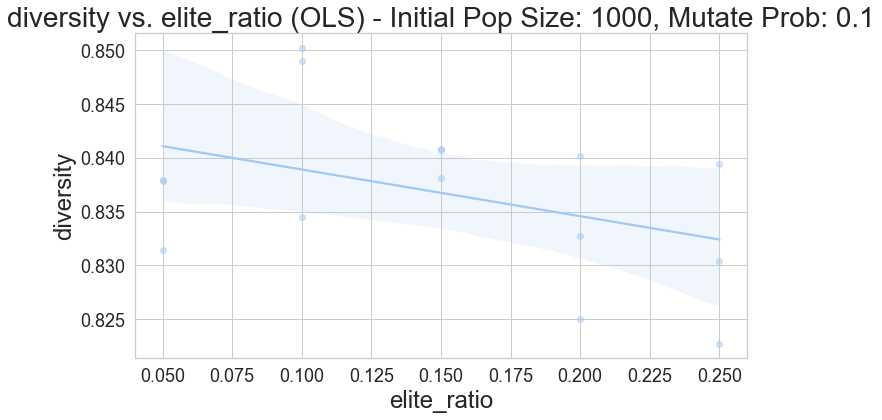

Initial Population Size: 1000, Mutate Probability: 0.2
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     5.517
Date:                Tue, 22 Oct 2024   Prob (F-statistic):             0.0353
Time:                        21:09:11   Log-Likelihood:                 52.127
No. Observations:                  15   AIC:                            -100.3
Df Residuals:                      13   BIC:                            -98.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


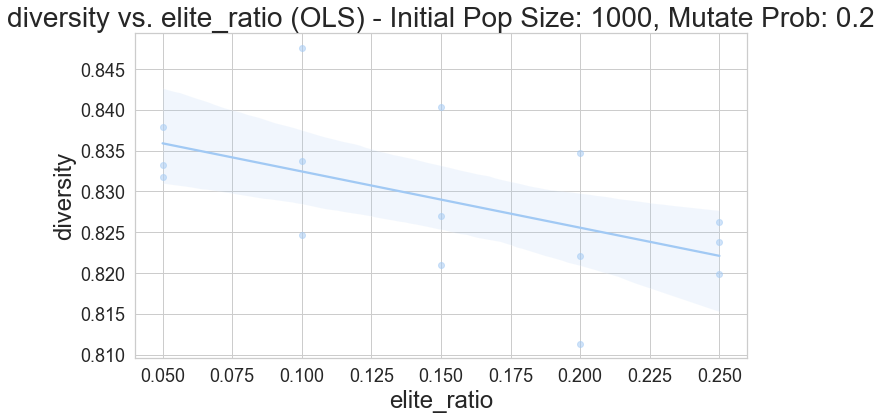

Initial Population Size: 1000, Mutate Probability: 0.3
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     8.589
Date:                Tue, 22 Oct 2024   Prob (F-statistic):             0.0117
Time:                        21:09:11   Log-Likelihood:                 55.681
No. Observations:                  15   AIC:                            -107.4
Df Residuals:                      13   BIC:                            -105.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


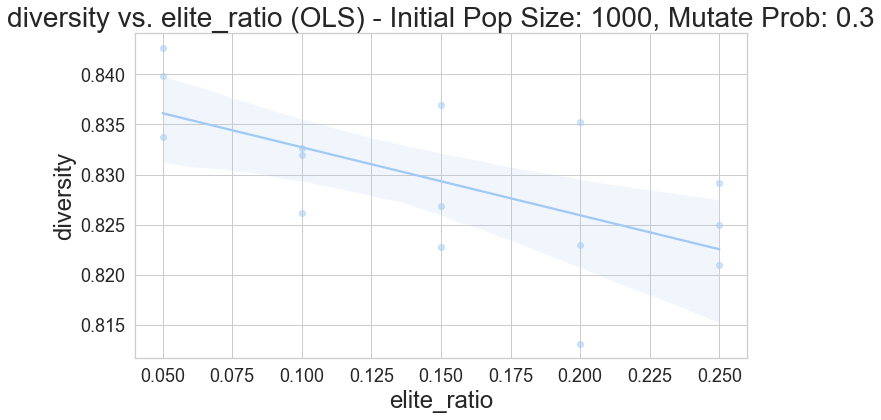

Initial Population Size: 1000, Mutate Probability: 0.4
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.072
Method:                 Least Squares   F-statistic:                   0.05827
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.813
Time:                        21:09:12   Log-Likelihood:                 45.421
No. Observations:                  15   AIC:                            -86.84
Df Residuals:                      13   BIC:                            -85.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


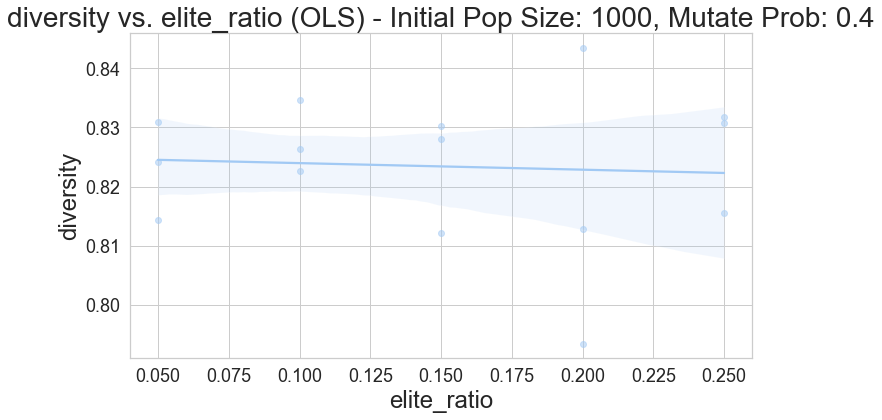

Initial Population Size: 1000, Mutate Probability: 0.5
Model Summary For diversity vs elite_ratio (OLS):
                            OLS Regression Results                            
Dep. Variable:              diversity   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.572
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.232
Time:                        21:09:12   Log-Likelihood:                 48.060
No. Observations:                  15   AIC:                            -92.12
Df Residuals:                      13   BIC:                            -90.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


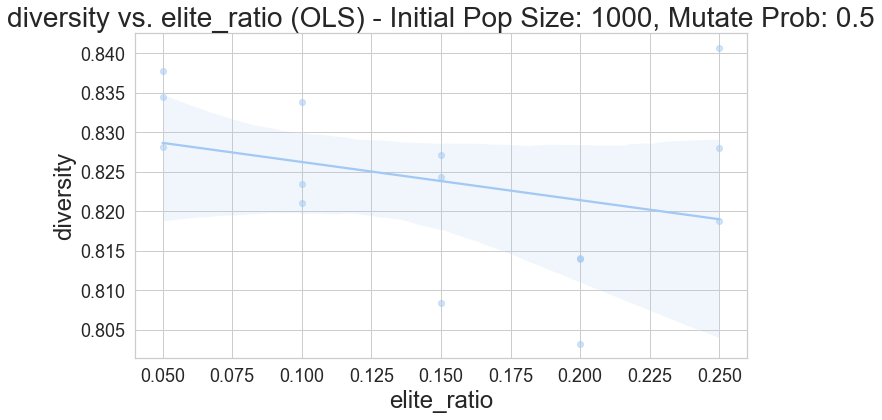

In [30]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge

# Define the parameters to analyze
param_list = [
    "elite_ratio",
]
# 
# Group the DataFrame by 'initial_pop_size' and 'mutate_prob'
groups = df.groupby(['initial_pop_size', 'mutate_prob'])

# Iterate through each group
for (initial_pop_size, mutate_prob), group in groups:
    
    print(f'Initial Population Size: {initial_pop_size}, Mutate Probability: {mutate_prob}')
    
    # Check if the group has at least 2 observations
    if len(group) < 2:
        print(f"Skipping group with Initial Pop Size: {initial_pop_size} and Mutate Prob: {mutate_prob} due to insufficient data.")
        continue  # Skip to the next group if it has fewer than 2 rows

    for param in param_list:
        
        stat = 'diversity'

        X = group[[param]]  # Use the original feature

        y = group[stat]
        X = sm.add_constant(X)  # Add constant term for intercept

        # Fit the linear regression model
        model = sm.OLS(y, X).fit()

        # Print the summary of the OLS regression
        print(f'Model Summary For {stat} vs {param} (OLS):')
        print(model.summary())

        # VIF Calculation
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        # Uncomment to print VIF
        # print(f'Variance Inflation Factor (VIF) for {param}:')
        # print(vif_data)

        # Fit Ridge Regression model
        ridge_model = Ridge(alpha=1.0)  # You can adjust alpha as needed
        ridge_model.fit(X, y)

        # Print Ridge regression coefficients
        ridge_coefficients = pd.DataFrame({
            "Feature": X.columns,
            "Coefficient": ridge_model.coef_
        })
        # Uncomment to print Ridge coefficients
        # print(f'Ridge Regression Coefficients for {stat} vs {param}:')
        # print(ridge_coefficients)

        # Plotting the regression line for OLS
        plt.figure(figsize=(10, 6))
        sns.regplot(x=param, y=stat, data=group, scatter_kws={'alpha':0.5})
        plt.title(f'{stat} vs. {param} (OLS) - Initial Pop Size: {initial_pop_size}, Mutate Prob: {mutate_prob}', fontsize=28)
    
        plt.xlabel(param, fontsize=24)
        plt.ylabel(stat, fontsize=24)
        plt.xticks(fontsize=18)  # Rotate x-axis labels for better readability
        plt.yticks(fontsize=18)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [33]:
df = pd.read_csv(r'C:\Users\Eli Brignac\OneDrive\Desktop\GGMD\visualizations\result_670.csv')

df_row0 = df.iloc[0,:].to_frame().T
df_row1 = df.iloc[0,:].to_frame().T

print(type(df_row0))
df_rows = pd.concat([df_row0, df_row1])
df_rows.head()
df_rows.to_csv('diversity_unit_test.csv', index=False)


<class 'pandas.core.frame.DataFrame'>


In [34]:
import visualization_suite_1 as vsuite
analysis = vsuite.FitnessDataProcessor(r'C:\Users\Eli Brignac\OneDrive\Desktop\GGMD\visualizations\diversity_unit_test.csv')
d = analysis.calculate_avg_diversity()
d.head()

,gen_num,diversity
0,0,0.0


Initial Population Size: 100
Model Summary For avg_fitness vs mutate_prob and initial_pop_size (OLS):
                            OLS Regression Results                            
Dep. Variable:            avg_fitness   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                 -0.157
Method:                 Least Squares   F-statistic:                    0.3209
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.601
Time:                        19:03:58   Log-Likelihood:                 2.8894
No. Observations:                   6   AIC:                            -1.779
Df Residuals:                       4   BIC:                            -2.195
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

c:\Users\Eli Brignac\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


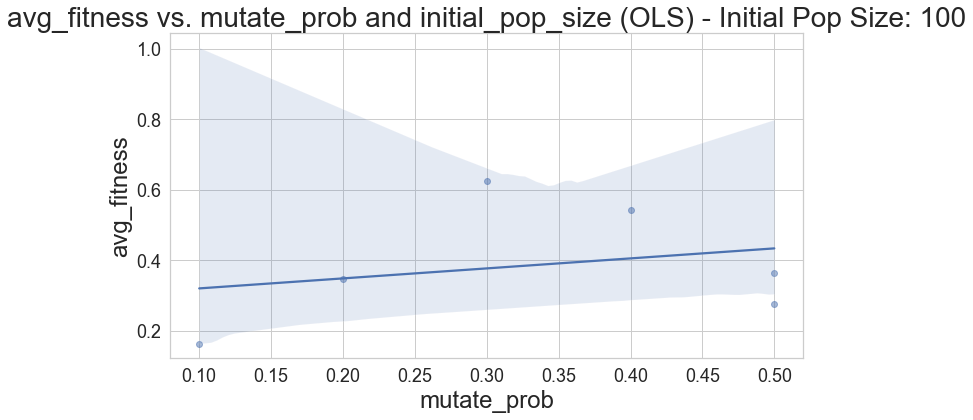

Initial Population Size: 500
Model Summary For avg_fitness vs mutate_prob and initial_pop_size (OLS):
                            OLS Regression Results                            
Dep. Variable:            avg_fitness   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     11.14
Date:                Tue, 22 Oct 2024   Prob (F-statistic):            0.00139
Time:                        19:03:58   Log-Likelihood:                 45.390
No. Observations:                  68   AIC:                            -86.78
Df Residuals:                      66   BIC:                            -82.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

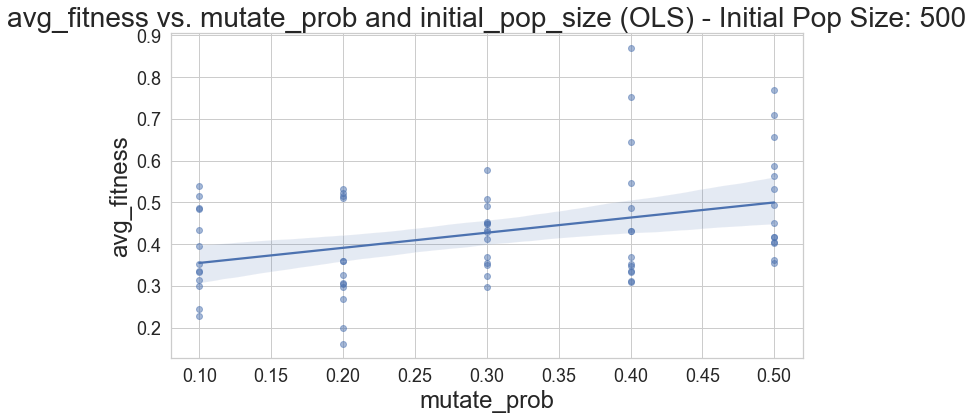

Initial Population Size: 1000
Model Summary For avg_fitness vs mutate_prob and initial_pop_size (OLS):
                            OLS Regression Results                            
Dep. Variable:            avg_fitness   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     16.46
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           0.000123
Time:                        19:03:58   Log-Likelihood:                 9.2838
No. Observations:                  75   AIC:                            -14.57
Df Residuals:                      73   BIC:                            -9.933
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------

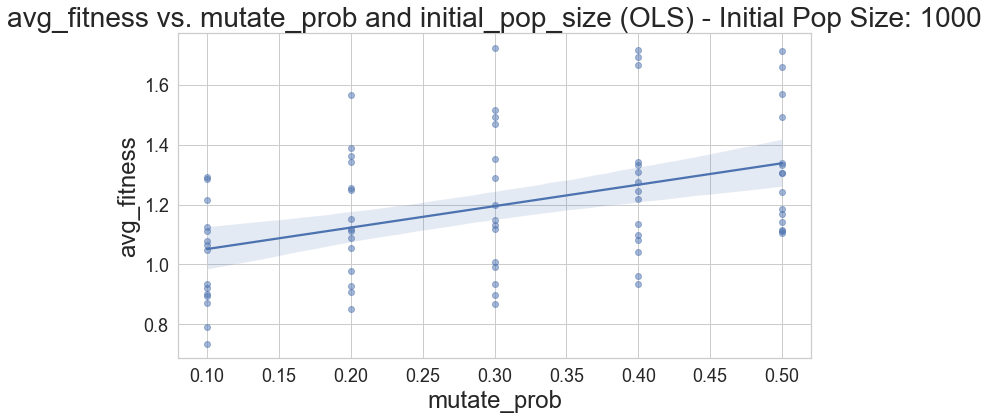

In [156]:
# Define the parameters to analyze, including initial_pop_size
param_list = [
    "mutate_prob",  # Add any other parameters you'd like to include
]

# Iterate through each group (no need to group by 'initial_pop_size' here since we're including it as a feature)
for initial_pop_size, group in groups:
    
    print(f'Initial Population Size: {initial_pop_size}')

    for param in param_list:
        
        stat = 'avg_fitness'

        # Set up the predictors (X) and target variable (y)
        X = group[[param]].copy()  # Copy mutate_prob
        X['initial_pop_size'] = group['initial_pop_size']  # Include initial_pop_size as a predictor
        y = group[stat]
        X = sm.add_constant(X)  # Add constant term for intercept

        # Fit the linear regression model with mutate_prob and initial_pop_size
        model = sm.OLS(y, X).fit()

        # Print the summary of the OLS regression
        print(f'Model Summary For {stat} vs {param} and initial_pop_size (OLS):')
        print(model.summary())

        # VIF Calculation
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        # Uncomment to print VIF
        # print(f'Variance Inflation Factor (VIF) for {param} and initial_pop_size:')
        # print(vif_data)

        # Fit Ridge Regression model
        ridge_model = Ridge(alpha=1.0)  # You can adjust alpha as needed
        ridge_model.fit(X, y)

        # Print Ridge regression coefficients
        ridge_coefficients = pd.DataFrame({
            "Feature": X.columns,
            "Coefficient": ridge_model.coef_
        })
        # Uncomment to print Ridge coefficients
        # print(f'Ridge Regression Coefficients for {stat} vs {param} and initial_pop_size:')
        # print(ridge_coefficients)

        # Plotting the regression line for OLS
        plt.figure(figsize=(10, 6))
        sns.regplot(x=param, y=stat, data=group, scatter_kws={'alpha':0.5})
        plt.title(f'{stat} vs. {param} and initial_pop_size (OLS) - Initial Pop Size: {initial_pop_size}', fontsize=28)
        plt.xlabel(param, fontsize=24)
        plt.ylabel(stat, fontsize=24)
        plt.xticks(fontsize=18)  # Rotate x-axis labels for better readability
        plt.yticks(fontsize=18)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
